In [97]:
import numpy as np
import pickle
import pandas as pd
import random
from matplotlib import pyplot as plt

Train: X=(60000, 784), y=(60000,)
Test: X=(10000, 784), y=(10000,)


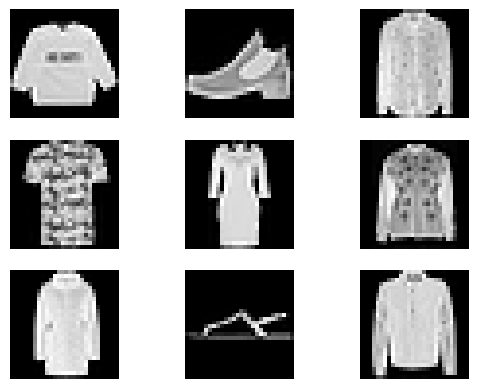

In [98]:
train_data = pd.read_csv('/kaggle/input/train-dataset/fashion-mnist_train.csv')
test_data = pd.read_csv('/kaggle/input/test-dataset/fashion-mnist_test.csv')

X_train = train_data.drop('label', axis=1)  
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']


print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))


for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train.iloc[i].values.reshape(28, 28), cmap='gray')  
    plt.axis('off')
plt.show()

In [99]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [100]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [101]:
X_train.iloc[0].shape 


(784,)

In [103]:
X_train = X_train.T
X_train.shape

(784, 60000)

In [104]:
X_test = X_test.T
X_test.shape

(784, 10000)

In [105]:
arr = X_train.iloc[:, 0].to_numpy()  
print(len(arr))

784


In [112]:
def init_params():
   
    W1 = np.random.rand(10, 784) - 0.5
   
    b1 = np.random.rand(10, 1)
    W2 = np.random.rand(20, 10) - 0.5
    b2 = np.random.rand(20, 1)
    W3 = np.random.rand(10, 20) - 0.5
    b3 = np.random.rand(10, 1)
    return W1, b1, W2, b2, W3, b3


def relu(Z):
    return np.maximum(0, Z)

def relu_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward(W1, b1, W2, b2, W3, b3, X):

    print("W1 shape:", W1.shape)
    print("X shape:", X.shape)

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    
    Z3 = np.dot(W3, A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3


def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y


def backward(W1, Z1, A1, W2, Z2, A2, W3, Z3, A3, X, y):
    m = X.shape[1] 
    one_hot_y = one_hot(y)
    dZ3 = A3 - one_hot_y
    dW3 = 1 / m * np.dot(dZ3, A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = np.dot(W3.T, dZ3) * relu_deriv(Z2)
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = np.dot(W2.T, dZ2) * relu_deriv(Z1)
    dW1 = 1 / m * np.dot(dZ1, X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W3 -= alpha * dW3
    b3 -= alpha * db3
    return W1, b1, W2, b2, W3, b3

In [113]:
def get_predictions(A):
    return np.argmax(A, axis = 0)

def get_accuracy(predictions, y):
    return np.sum(predictions == y) / y.size

def gradient_descent(X, y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward(W1, Z1, A1, W2, Z2, A2, W3, Z3, A3, X, y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i == 0 or (i+1) % 100 == 0:
            print("Iteration: {}".format(i + 1))
            predictions = get_predictions(A3)
            print("Predicted Labels: {}, True Labels: {}".format(predictions, y))
            print("Accuracy: {}".format(get_accuracy(predictions, y)))
    return W1, b1, W2, b2, W3, b3
    
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, y_train, 0.10, 2000)

W1 shape: (10, 784)
X shape: (784, 60000)
Iteration: 1
Predicted Labels: [3 3 3 ... 3 3 3], True Labels: 0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64
Accuracy: 0.10015
W1 shape: (10, 784)
X shape: (784, 60000)
W1 shape: (10, 784)
X shape: (784, 60000)
W1 shape: (10, 784)
X shape: (784, 60000)
W1 shape: (10, 784)
X shape: (784, 60000)
W1 shape: (10, 784)
X shape: (784, 60000)
W1 shape: (10, 784)
X shape: (784, 60000)
W1 shape: (10, 784)
X shape: (784, 60000)
W1 shape: (10, 784)
X shape: (784, 60000)
W1 shape: (10, 784)
X shape: (784, 60000)
W1 shape: (10, 784)
X shape: (784, 60000)
W1 shape: (10, 784)
X shape: (784, 60000)
W1 shape: (10, 784)
X shape: (784, 60000)
W1 shape: (10, 784)
X shape: (784, 60000)
W1 shape: (10, 784)
X shape: (784, 60000)
W1 shape: (10, 784)
X shape: (784, 60000)
W1 shape: (10, 784)
X shape: (784, 60000)
W1 shape: (10, 784)
X shape: (784, 60000)
W

In [114]:
params = (W1, b1, W2, b2, W3, b3)
params_file = open("params.pkl","wb")
pickle.dump(params, params_file)
params_file.close()

In [115]:
params_file = open("params.pkl", "rb")
params = pickle.load(params_file)
W1, b1, W2, b2, W3, b3 = params
params_file.close()

In [116]:
def predict(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def visualize_predictions(idx, W1, b1, W2, b2, W3, b3):
    current_image = X_test.iloc[idx].values.reshape(-1, 1) 
    prediction = predict(current_image, W1, b1, W2, b2, W3, b3)
    label = y_test[idx]
    print("Predicted Label: {}, True Label: {}".format(prediction, label))

    image_side = 28  
    current_image = current_image.reshape((image_side, image_side)) * 255
    plt.imshow(current_image, cmap='gray')
    plt.show()

def test(X, y, W1, b1, W2, b2, W3, b3):
    y_predicted = predict(X, W1, b1, W2, b2, W3, b3)
    test_accuracy = get_accuracy(y_predicted, y)
    print("Test Accuracy: {}".format(test_accuracy))

In [117]:
test(X_test, y_test, W1, b1, W2, b2, W3, b3)

W1 shape: (10, 784)
X shape: (784, 10000)
Test Accuracy: 0.8168
